<a href="https://colab.research.google.com/github/gabrielawad/Fundamentos-de-optimizacion-lineal/blob/main/Taller_06_asignaci%C3%B3n_de_recursos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «Es absolutamente imposible encarar problema humano alguno con una mente carente de prejuicios».
### [Simone de Beauvoir](https://es.wikipedia.org/wiki/Simone_de_Beauvoir)

# Taller 06 asignación de recursos

En este taller aprenderá los conceptos básicos del problema de asignación de recursos.

## Asignación de recursos

**Situaciones**: Asignar recursos a tareas

**caso base**:

* El número de recursos es igual al número de tareas.
* Cada recurso se debe asignar a una única tarea exactamente.
* Cada tarea debe tener asignado exactamente un único recurso.
* Para cada pareja (recurso, tarea) se conoce el costo que supone realizar la tarea utilizando dicho recurso.

**Objetivo:** Determinar cómo deben hacerse las n asignaciones para que el costo total de la asignación sea mínimo.


## Ejemplo 00

Tres hermanos Jaime, Pipe y Linda, quieren ganar algún dinero para cubrir sus gastos de celular del mes actual.

Su padre ha diseñado tres posibles tareas para ayudarle en este tema a sus hijos: lavar a mano los tenis, planchar las camisas de cuello y bañar los tres gatos.

El padre le pidió a cada hijo que entregara un papel secreto donde se indicara el pago que cada hijo consideraría justo por cada una de las tareas. Los hermanos se comprometieron a aceptar la asignación de tareas que finalmente haga su padre.

¿Qué tareas debería asignar el padre a cada hijo, con el fin de gastar lo menos posible?

Tenga en cuenta que cada tarea puede ser asignada solamente una vez, y que cada hermano debe tener como mínimo una tarea por realizar.


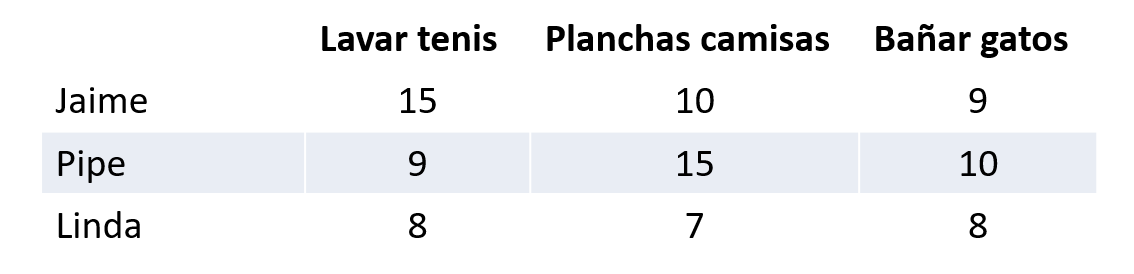

In [ ]:
# Importar las librerías que se van a utilizar
import cvxpy as cvx

# Crear las variables a optimizar
j_tenis = cvx.Variable(name = "Jaime - lavar tenis", boolean = True)
j_camisas = cvx.Variable(name = "Jaime - planchar camisas", boolean = True)
j_gatos = cvx.Variable(name = "Jaime - bañar gatos", boolean = True)

p_tenis = cvx.Variable(name = "Pipe - lavar tenis", boolean = True)
p_camisas = cvx.Variable(name = "Pipe - planchar camisas", boolean = True)
p_gatos = cvx.Variable(name = "Pipe - bañar gatos", boolean = True)

l_tenis = cvx.Variable(name = "Linda  - lavar tenis", boolean = True)
l_camisas = cvx.Variable(name = "Linda  - planchar camisas", boolean = True)
l_gatos = cvx.Variable(name = "Linda  - bañar gatos", boolean = True)

# Definir la función objetivo para maximizar el ingreso
# Unidades
obj_hijos = cvx.Minimize(
    15*j_tenis + 10* j_camisas + 9*j_gatos +
    9*p_tenis + 15*p_camisas + 10*p_gatos +
     8*l_tenis + 7*l_camisas + 8*l_gatos)

# Establecer las restricciones
rest_hijos = [
    # Asignaciones hijos
    j_tenis + j_camisas + j_gatos == 1,
    p_tenis + p_camisas + p_gatos == 1,
    l_tenis + l_camisas + l_gatos == 1,

    # Asignaciones tareas
    j_tenis + p_tenis + l_tenis == 1,
    j_camisas + p_camisas + l_camisas == 1,
    j_gatos + p_gatos + l_gatos == 1]

# Configurar el problema
prob_hijos = cvx.Problem(obj_hijos, rest_hijos)

# Obtener el valor óptimo
prob_hijos.solve()

# Mostrar el estado de la solución
print("Estado de la solución:",  prob_hijos.status, "\n")

# Mostrar el valor óptimo de la función objetivo
print ("Valor máximo:", "%.2f"% prob_hijos.value, "\n")

# Mostrar los valores óptimos de las variables de decisión
print ("Asignación de tareas")
print (j_tenis, "%.0f"% j_tenis.value)
print (j_camisas, "%.0f"% j_camisas.value)
print (j_gatos, "%.0f"% j_gatos.value, "\n")
print (p_tenis, "%.0f"% p_tenis.value)
print (p_camisas, "%.0f"% p_camisas.value)
print (p_gatos, "%.0f"% p_gatos.value, "\n")
print (l_tenis, "%.0f"% l_tenis.value)
print (l_camisas, "%.0f"% l_camisas.value)
print (l_gatos, "%.0f"% l_gatos.value)

## Ejemplo 01
Una aerolínea de carga dispone de cuatro aviones para atender cuatro rutas. Cada avión debe hacer una ruta y cada ruta debe realizarse exclusivamente por un avión.

Asigne los aviones a las rutas de tal manera que se minimice el costo total.

Los costos de cada avión para las distintas rutas dependen de las características del aeroplano y de la ruta escogida y se presentan en la siguiente tabla:

 |  |Med-Caracas|Med-Panamá|Med-Buenos Aires|Med-Sao Paulo|
|---------|--------|--------|--------| --------|
|Avión 1|     150|200|-|100|
|Avión 2|     100| -|300|250|
|Avión 3|     250|140|240|-|
|Avión 4|-|250|100|300|



In [ ]:
# Importar las librerías que se van a utilizar
import cvxpy as cvx

# Crear las variables a optimizar
a1_caracas = cvx.Variable(name = "Avión 1 - Caracas", boolean = True)
a1_panama = cvx.Variable(name = "Avión 1 - Panamá", boolean = True)
#a1_bsaires = cvx.Variable(name = "Avión 1 - Buenos Aires", boolean = True)
a1_saopaulo = cvx.Variable(name = "Avión 1 - Sao Paulo", boolean = True)

a2_caracas = cvx.Variable(name = "Avión 2 - Caracas", boolean = True)
#a2_panama = cvx.Variable(name = "Avión 2 - Panamá", boolean = True)
a2_bsaires = cvx.Variable(name = "Avión 2 - Buenos Aires", boolean = True)
a2_saopaulo = cvx.Variable(name = "Avión 2 - Sao Paulo", boolean = True)

a3_caracas = cvx.Variable(name = "Avión 3 - Caracas", boolean = True)
a3_panama = cvx.Variable(name = "Avión 3 - Panamá", boolean = True)
a3_bsaires = cvx.Variable(name = "Avión 3 - Buenos Aires", boolean = True)
#a3_saopaulo = cvx.Variable(name = "Avión 3 - Sao Paulo", boolean = True)

#a4_caracas = cvx.Variable(name = "Avión 4 - Caracas", boolean = True)
a4_panama = cvx.Variable(name = "Avión 4 - Panamá", boolean = True)
a4_bsaires = cvx.Variable(name = "Avión 4 - Buenos Aires", boolean = True)
a4_saopaulo = cvx.Variable(name = "Avión 4 - Sao Paulo", boolean = True)

# Definir la función objetivo para maximizar el ingreso
# Unidades
obj_aviones = cvx.Minimize(
    150*a1_caracas + 200*a1_panama + 100*a1_saopaulo +
    100*a2_caracas + 300*a2_bsaires + 250*a2_saopaulo +
    250*a3_caracas + 140*a3_panama + 240*a3_bsaires +
    250*a4_panama + 100*a4_bsaires + 300*a4_saopaulo)

# Establecer las restricciones
rest_aviones = [
    # Restricciones de aviones
    a1_caracas + a1_panama + a1_saopaulo == 1,
    a2_caracas + a2_bsaires + a2_saopaulo == 1,
    a3_caracas + a3_panama + a3_bsaires == 1,
    a4_panama + a4_bsaires + a4_saopaulo == 1,

    # Restricciones de rutas
    a1_caracas + a2_caracas + a3_caracas  == 1,
    a1_panama + a3_panama + a4_panama == 1,
    a2_bsaires + a3_bsaires + a4_bsaires == 1,
    a1_saopaulo + a2_saopaulo + a4_saopaulo == 1
]

# Configurar el problema
prob_aviones = cvx.Problem(obj_aviones, rest_aviones)

# Obtener el valor óptimo
prob_aviones.solve()

# Mostrar el estado de la solución
print("Estado de la solución:", prob_aviones.status , "\n")

# Mostrar el valor óptimo de la función objetivo
print ("Valor máximo:", "%.2f"% prob_aviones.value , "\n")

# Mostrar los valores óptimos de las variables de decisión
print ("Asignación de aviones")
print (a1_caracas, "%.0f"% a1_caracas.value)
print (a1_panama, "%.0f"% a1_panama.value)
print (a1_saopaulo, "%.0f"% a1_saopaulo.value, "\n")
print (a2_caracas, "%.0f"% a2_caracas.value)
print (a2_bsaires, "%.0f"% a2_bsaires.value)
print (a2_saopaulo, "%.0f"% a2_saopaulo.value, "\n")
print (a3_caracas, "%.0f"% a3_caracas.value)
print (a3_panama, "%.0f"% a3_panama.value)
print (a3_bsaires, "%.0f"% a3_bsaires.value, "\n")
print (a4_panama, "%.0f"% a4_panama.value)
print (a4_bsaires, "%.0f"% a4_bsaires.value)
print (a4_saopaulo, "%.0f"% a4_saopaulo.value)


# Ejercicios

Resolver los siguientes ejercicios con CVXPY.

## Ejercicio 00

Una empresa agrícola tiene 3 tractores y 3 lotes de cultivo. Cada tractor tiene costos diferentes de operación en cada lote debido a consumo de combustible, mantenimiento y eficiencia en cada tipo de terreno.  

| Tractor | Lote 1 | Lote 2 | Lote 3 |  
|---------|--------|--------|--------|  
| A       | 750,000 | 720,000 | 780,000 |  
| B       | 700,000 | 740,000 | 720,000 |  
| C       | 730,000 | 760,000 | 710,000 |  

**Objetivo:** Minimizar el costo total de operación de tractores.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 01

Una empresa de software debe asignar 5 ingenieros a 5 proyectos distintos, considerando costos salariales y diferencias de experiencia en cada proyecto.  

| Ingeniero | Proyecto 1 | Proyecto 2 | Proyecto 3 | Proyecto 4 | Proyecto 5 |  
|-----------|-----------|-----------|-----------|-----------|-----------|  
| A         | 8'500,000 | - | 8'200,000 | 8'700,000 | 8'400,000 |  
| B         | 8'200,000 | 8'400,000 | 8'600,000 | 8'500,000 | 8'700,000 |  
| C         | 8'400,000 | 8'600,000 | - | 8'200,000 | 9'000,000 |  
| D         | 8'700,000 | 8'200,000 | 8'400,000 | 9'000,000 | 8'500,000 |  
| E         | 8'900,000 | 8'500,000 | 8'700,000 | 8'800,000 | 8'200,000 |  

**Objetivo:** Minimizar el costo total de asignación de ingenieros.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 02

Una universidad debe asignar 6 profesores a 6 cursos distintos, considerando diferencias salariales y costos adicionales por cada asignación.  

| Docente | Curso 1 | Curso 2 | Curso 3 | Curso 4 | Curso 5 | Curso 6 |  
|---------|--------|--------|--------|--------|--------|--------|  
| X       | 4'500,000 | 4'700,000 | 4'200,000 | 4'600,000 | 4'300,000 | 4'400,000 |  
| Y       | 4'200,000 | 4'400,000 | 4'600,000 | 4'500,000 | 4'300,000 | 4'700,000 |  
| Z       | 4'300,000 | 4'500,000 | 4'700,000 | 4'200,000 | 4'600,000 | 4'400,000 |  
| W       | 4'400,000 | 4'200,000 | 4'300,000 | 4'700,000 | 4'500,000 | 4'600,000 |  
| V       | 4'600,000 | 4'300,000 | 4'400,000 | 4'500,000 | 4'700,000 | 4'200,000 |  
| U       | 4'700,000 | 4'600,000 | 4'500,000 | 4'300,000 | 4'400,000 | 4'200,000 |  

**Objetivo:** Minimizar el costo total de contratación docente.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 03

Una empresa de logística tiene 4 camiones y 4 rutas de entrega de mercancía. Cada camión tiene un costo diferente para cada ruta, dependiendo del consumo de combustible, peajes y tiempo estimado.  

| Camión  | Ruta A | Ruta B | Ruta C | Ruta D |  
|---------|--------|--------|--------|--------|  
| 1       | 320,000 | 280,000 | 310,000 | 330,000 |  
| 2       |- | 290,000 |- | 340,000 |  
| 3       | 310,000 | 320,000 | 300,000 | 290,000 |  
| 4       | 330,000 | 310,000 | 290,000 | 280,000 |  

**Objetivo:** Minimizar el costo total de las entregas.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 04

Un hospital debe asignar 5 médicos a 5 turnos nocturnos. Cada médico tiene un costo asociado por turno debido a diferencias en experiencia, especialización y horas extras.  

| Médico  | Turno 1 | Turno 2 | Turno 3 | Turno 4 | Turno 5 |  
|---------|--------|--------|--------|--------|--------|  
| A       | 450,000 | 420,000 | 430,000 | 460,000 | 410,000 |  
| B       | 470,000 | 440,000 | 400,000 | 450,000 | 430,000 |  
| C       | 420,000 | 430,000 | 410,000 | 440,000 | 460,000 |  
| D       | 430,000 | 450,000 | 460,000 | 420,000 | 410,000 |  
| E       | 440,000 | 410,000 | 420,000 | 430,000 | 450,000 |  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 05

Una empresa constructora debe asignar 4 equipos de trabajo a 4 proyectos de construcción en Bogotá. Cada equipo tiene costos diferentes en cada proyecto según la distancia, experiencia y el tipo de obra.  

| Equipo | Proyecto 1 (Edificio Residencial) | Proyecto 2 (Puente) | Proyecto 3 (Vía Urbana) | Proyecto 4 (Centro Comercial) |  
|--------|--------------------------|-----------------|-----------------|---------------------|  
| E1     | 15'200,000               | 15'000,000      | 14'800,000      | 15'500,000         |  
| E2     | 15'500,000               | 14'900,000      | 15'100,000      | 15'200,000         |  
| E3     | 15'000,000               | 15'300,000      | 15'400,000      | 14'900,000         |  
| E4     | 14'800,000               | 15'100,000      | 15'200,000      | 15'300,000         |  

**Objetivo:** Minimizar el costo total de asignación de equipos a proyectos.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 06
Una empresa eléctrica debe asignar 6 técnicos a 6 subestaciones para realizar mantenimiento. Cada técnico tiene costos diferentes en cada subestación debido a su ubicación y especialidad.  

| Técnico  | Subestación 1 | Subestación 2 | Subestación 3 | Subestación 4 | Subestación 5 | Subestación 6 |  
|----------|--------------|--------------|--------------|--------------|--------------|--------------|  
| T1       | 1'200,000    | 1'100,000    | 1'150,000    | 1'130,000    | -    | 1'190,000    |  
| T2       | 1'180,000    | 1'140,000    | 1'120,000    | 1'160,000    | 1'130,000    | 1'200,000    |  
| T3       | 1'130,000    | 1'120,000    | 1'140,000    | 1'190,000    | 1'200,000    | - |  
| T4       | 1'140,000    | 1'130,000    | 1'170,000    | 1'150,000    | 1'200,000    | 1'160,000    |  
| T5       | 1'160,000    | 1'190,000    | 1'200,000    | 1'120,000    | 1'150,000    | 1'130,000    |  
| T6       | 1'200,000    | 1'170,000    | 1'130,000    | 1'140,000    | 1'120,000    | 1'180,000    |  

**Objetivo:** Minimizar el costo total de mantenimiento.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 07
Una agencia de turismo debe asignar 3 guías a 3 rutas turísticas en Cartagena. Cada guía tiene un costo diferente según su experiencia y el idioma que maneja.  

| Guía     | Ruta 1 (Ciudad Amurallada) | Ruta 2 (Islas del Rosario) | Ruta 3 (Castillo de San Felipe) |  
|----------|--------------------------|----------------------|--------------------------|  
| A        | 450,000                  | 500,000              | 480,000                  |  
| B        | 470,000                  | - | 460,000                  |  
| C        | 460,000                  | 490,000              | 470,000                  |  

**Objetivo:** Minimizar el costo total de los guías turísticos.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 08

Una fábrica de calzado debe asignar 5 máquinas a 5 procesos de producción (corte, ensamblaje, costura, pegado y acabado). Cada máquina tiene un costo de operación diferente en cada proceso debido al consumo de energía y la eficiencia en la tarea.  

| Máquina  | Corte | Ensamblaje | Costura | Pegado | Acabado |  
|----------|-------|-----------|---------|--------|---------|  
| M1       | 2'100,000 | 2'000,000 | 2'200,000 | 2'300,000 | 2'150,000 |  
| M2       | 2'250,000 | 2'100,000 | 2'050,000 | 2'300,000 | 2'200,000 |  
| M3       | 2'200,000 | 2'250,000 | 2'300,000 | 2'050,000 | 2'100,000 |  
| M4       | 2'150,000 | 2'300,000 | 2'100,000 | 2'200,000 | 2'050,000 |  
| M5       | 2'300,000 | 2'200,000 | 2'250,000 | 2'100,000 | 2'050,000 |  

**Objetivo:** Minimizar el costo total de operación de las máquinas.  

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 09


Un banco debe asignar 4 analistas a 4 solicitudes de crédito corporativo. Cada analista tiene un costo asociado según su nivel de experiencia y el tiempo estimado que requiere evaluar cada solicitud.  

| Analista  | Solicitud 1 | Solicitud 2 | Solicitud 3 | Solicitud 4 |  
|-----------|------------|------------|------------|------------|  
| A         | 950,000    | 1'020,000  | 970,000    | 1'010,000  |  
| B         | 1'000,000  | -    | 990,000    | 960,000    |  
| C         | 970,000    | -    | 1'010,000  | 1'020,000  |  
| D         | 980,000    | 1'000,000  | 960,000    | 970,000    |  

**Objetivo:** Minimizar el costo total de asignar analistas a evaluaciones de crédito.  

In [ ]:
# Resuelva en esta celda el ejercicio
